### Project 1: Part 3

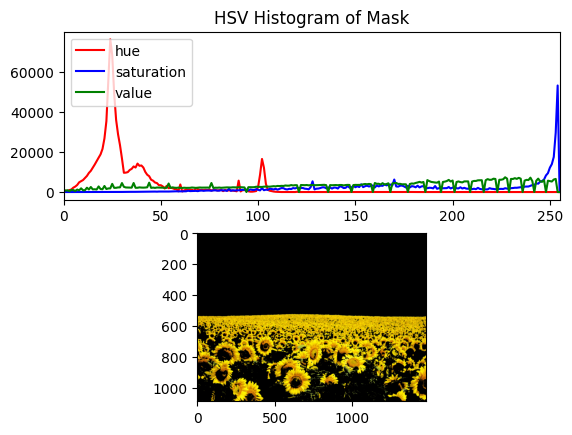

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = "/content/Input.png"

def gamma_correction(img, gamma):
    # Normalize the image to [0, 1], apply gamma correction, and then scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    # Return the corrected image
    return np.uint8(corrected)

def masking_pipeline(filename):

  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Apply gamma correction and display the result
  gamma = 1.2
  corrected_image = gamma_correction(img, gamma)

  # Crop image for focus on sunflower sillhouettes
  img_masked = corrected_image[500:1200, 0:1500]

  # Convert to HSV and create HSV histogram to analyze for sunflower sections
  img_masked = cv2.cvtColor(img_masked,cv2.COLOR_RGB2HSV)

  #Hue plot
  plt.subplot(2, 1, 1)
  hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
  plt.plot(hist,color='red')
  plt.xlim([0,255])

  #Saturation plot
  hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
  plt.plot(hist,color='blue')
  plt.xlim([0,255])

  #Value
  hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
  plt.plot(hist,color='green')
  plt.xlim([0,255])

  plt.legend(["hue","saturation","value"],loc = 'upper left')
  plt.title("HSV Histogram of Mask")

  #Determining the HSV ranges that are sunflowers based on histogram
  lower_bound = (0,150,150)
  upper_bound = (50,280,280)
  skin_image = cv2.inRange(img_masked, lower_bound, upper_bound)

  #masking out only the parts we want aka sunflowers
  img_masked = img[500:1200, 0:1500]
  output_image = cv2.bitwise_and(img_masked, img_masked, mask = skin_image)

  # making it the original size by setting img equal to new mask and the rest of the regions black
  img[500:1200,0:1500] = output_image
  img[0:500, 0:1500] = 0

  plt.subplot(2,1,2)
  plt.imshow(img)

masking_pipeline(filename)